
## 1 dimensional gradient descent for simple linar regression

In this notebook, we work with the systolic blood pressure data of 33 American women. We fit a simple linear regression model to the data and want to find the optimal values for the slope a and the intercept b. Based on our starting values a=1 and b=100, we calculate the mean squared error (MSE) loss and try to minimize the loss by random guessing. Using the closed form solution we will find the optimal values for the parameters a and b where the MSE loss is minimal. In the end fix the intercept b to the optimal value and use the gradient descent formula to fine the optimal value for the slope a. We play around with the learning rate eta and observe that it is a very important hyperparameter.

* Displays the loss function for linear regression with one parameters for the blood pressure data.
* Demonstrates gradient descent (assumnes the formula for the gradient as given in the book)
* Plots the successive updates of the parameter 


<a href="https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/nb_01.ipynb" target="_blank"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="open in colab">
</a>
| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/nb_01.ipynb)

##         “Hello world” in curve fitting


#### Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression


#### Blood Pressure data 
Here we read in the systolic blood pressure and the age of the 33 American women in our dataset.

In [0]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32) 

Let plot the data in a scatter plot and use the skleran library to determine and print the opimal values for the slope a and the intercept b. We see that our starting values a=1 and b=100 are not the values that are minimizing the loss.

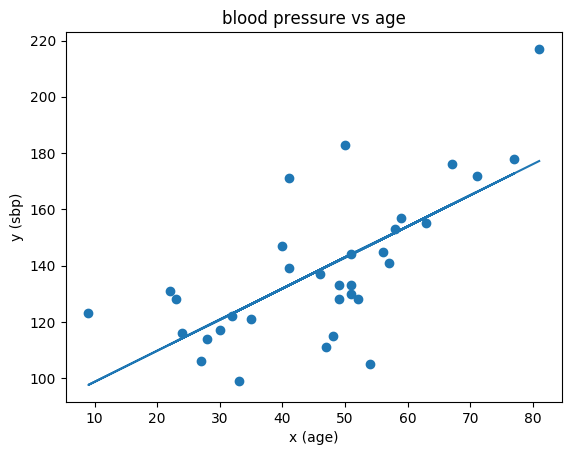

intercept =  87.67143 solpe =  1.1050216


In [3]:
plt.scatter(x=x,y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)


####  MSE for all data points

In the next cell for calculate and print the mean squared error (MSE) loss with our starting values a=1 and b=10

In [4]:
a = 1                            
b = 100                          
y_hat = a*x + b                  
r = (y - y_hat)                  
MSE = np.sum(np.square(r)) / len(y)     
MSE


408.1515151515151

#### Minimize the MSE by randomly trying different values for the slope a and the intercept 
<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  
*Exercise: try to find better values for a and b (by randolmly increasing/decreasing a and/or b), yielding a lower MSE. 
Remember that a was 1, b was 100 and the MSE was 408.15*



In [5]:
a =0.9                            # try a diffrent value for a here that minimizes the MSE 
b =101                            # try a diffrent value for b here that minimizes the MSE

y_hat = a*x + b                  
r = (y - y_hat)                  
MSE = np.sum(np.square(r)) / len(y)     
MSE

375.356415719697

#### Using the closed form solution to minimize the MSE with a and b

Now we determine the optimal values for the slope a and intercept b with the closed solution formula and print them with the minimal MSE. if you compare the results with the ones form the skleran linear regression, you see that they are equal.   

#### closed form solution:

$$
    \hat{\alpha} = \frac{\sum\limits_{i=1}^{n}(x_i – \bar{x}) (y_i – \bar{y})} {\sum\limits_{i=1}^{n}(x_i – \bar{x})^2}
$$
\hat{\alpha} = \frac{\sum\limits_{i=1}^{n}(x_i – \bar{x}) (y_i – \bar{y})} {\sum\limits_{i=1}^{n}(x_i – \bar{x})^2}
$$
$$
    \hat{\beta} = \bar{y} – \hat{\alpha} \bar{x} 
$$

In [6]:
a_hat = np.sum((x-np.mean(x))*((y-np.mean(y)))) / (np.sum(np.square(x-np.mean(x))))
b_hat = np.mean(y) - a_hat*np.mean(x)

a = a_hat                         
b = b_hat                       
y_hat = a*x + b                  
r = (y - y_hat)                  
MSE = np.sum(r**2) / len(y)      

print("slope : a_hat = " ,a_hat)
print("intercept : b_hat = " ,b_hat)
print("minimal MSE = ", MSE)

slope : a_hat =  1.1050217
intercept : b_hat =  87.67143
minimal MSE =  349.20090553977275


##        Gradient descent method 1D
Now we use the gradient descent method in 1 dimension to find the an optinal value for a. For this we fix the intercept b to the optimal value and calculate the MSE loss for diffrent values of the slope a. Then we plot the loss a as function of the slope.

In [0]:
b = 87.6
a = np.arange(-1, 2, 0.02)
MSE=np.zeros(len(a))
for i in range(0,len(a)):
  MSE[i] =  np.mean(np.square(y-(a[i] * x + b)))

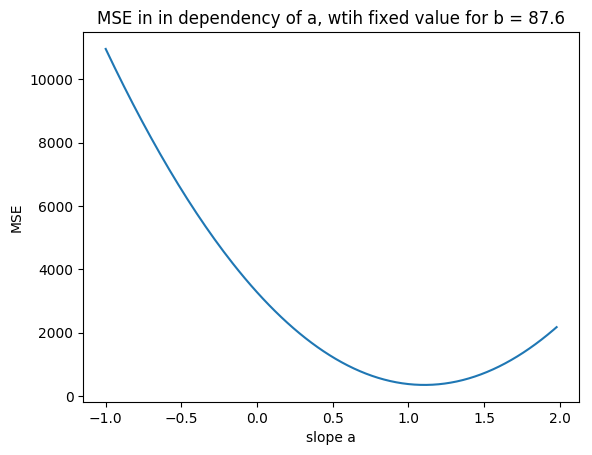

In [8]:
plt.plot(a,MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.show()

#### Change the learning rate and study how the slope a gets updated
Lets use the gradient descent method in 1 dimension to find the an better value for a. We start with a = -0.5 and a learning rate eta = 0.0003 and make 5 update steps. 


<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  
Exercise : Run the two cells below and then try to find a better learning rate eta that reaches the optimal value for a. Try larger and smaller values. What do you observe?


In [9]:
a_ = -0.5
a_history = -0.5
eta = 0.0003
for i in range(0,5):
  grad_a = -2/len(y)*np.sum((y -a_ * x - b) *x) 
  a_ = a_ - eta*grad_a
  a_history =np.append(a_history,a_) 
print(a_history)

[-0.5         1.80608736  0.80163942  1.23914048  1.04858093  1.1315818 ]


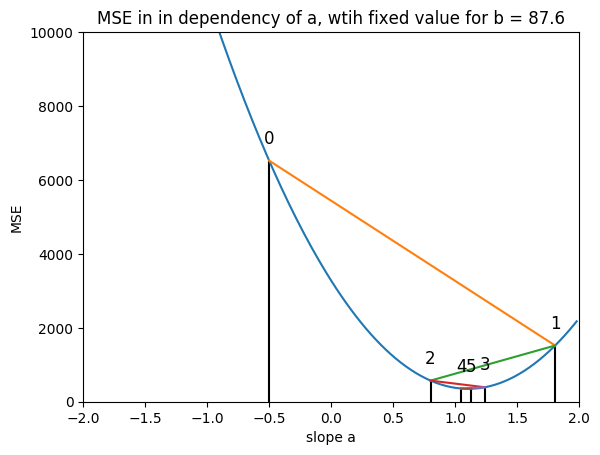

In [10]:
plt.plot(a,MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.ylim((0,10000))
plt.xlim((-2,2))

for i in range(0,len(a_history)):
  plt.vlines(x=a_history[i],ymin=0,ymax= np.mean(np.square(y-(a_history[i] * x + b))))
  plt.text(x=a_history[i],y= np.mean(np.square(y-(a_history[i] * x + b)))+600,s= i,horizontalalignment='center',verticalalignment='center',fontsize=12)
for i in range(0,len(a_history)-1):
  plt.plot([a_history[i], a_history[i+1]],[np.mean(np.square(y-(a_history[i] * x + b))), np.mean(np.square(y-(a_history[i+1] * x + b)))])
plt.show()